# Lab 2a: Trees

Lab associated with Module 2a: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))
# THIS IS REALLY NICE ^ THANKS

***

### Section 0: Imports

In [2]:
import numpy as np
import math

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

In [4]:
# Graph docs
# https://graphviz.readthedocs.io/en/stable/manual.html
# https://www.graphviz.org/

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [5]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

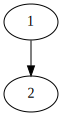

In [6]:
dot

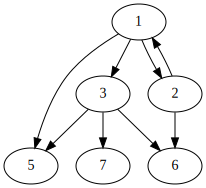

In [7]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [8]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [9]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [10]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [11]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [12]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [13]:
# NOTE: I added a 'dont_show' attribute so that the red black graphs dident show all the connections to the same non-existant black nodes
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            if not hasattr(tree.left, 'dont_show'):
                dot.node(name=str(tree.left) ,label=str(tree.left.val))
                dot.edge(str(tree), str(tree.left))
                dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            if not hasattr(tree.right, 'dont_show'):
                dot.node(name=str(tree.right) ,label=str(tree.right.val))
                dot.edge(str(tree), str(tree.right))
                dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

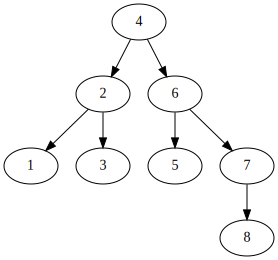

In [14]:
dot = visualize_tree(test1_tree)

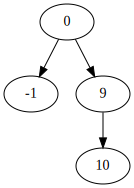

In [15]:
dot = visualize_tree(test2_tree)

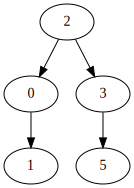

In [16]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [17]:
# NOTE: I have taken the libity of making search return the actual object as this is more useful, searches functionality is replaced with does_exist(nodes, val)

def search(nodes, val):

    if val == nodes.val:
        return nodes

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)
# --


def does_exist(nodes, val):
    return not search(nodes, val) == False
# --

In [18]:
does_exist(test3_tree, 3)

True

In [19]:
does_exist(test1_tree, 18)

False

Let us write insert function now:

In [20]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

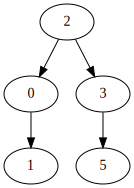

In [21]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

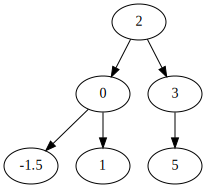

In [22]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [23]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

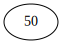

In [24]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

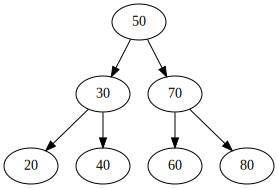

In [25]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

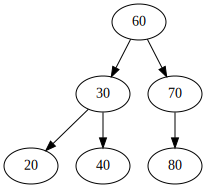

In [26]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

### <font color='red'> Section 3 [optional]: Write an algorithm to check if a binary tree is a BST.

This recursivly checks to see if nodes values are actually placed left when smaller.
The temp value is set to -infinity to begin with and is set to larget values as the tree is traversed.
By checking the increasing value against left and then right, if a smaller value is a child of a right child this will mean that the value was not inserted to the left and thus is not reachable/ordered properly.

True


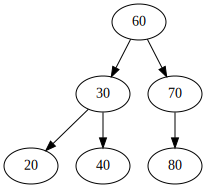

In [27]:


def check_bst(nodes, temp):
    # Empty Tree
    if nodes == None:
        return True
    # --
    
    if not check_bst(nodes.left, temp):
        return False
    # --
    
    if nodes.val < temp:
        return False
    # --
    
    temp = nodes.val
    
    return check_bst(nodes.right, temp)
    
# --

is_bst = check_bst(test3_tree, -math.inf)

print(is_bst)

dot = visualize_tree(test3_tree)



eg 1 False


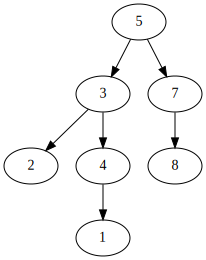

eg 2 True


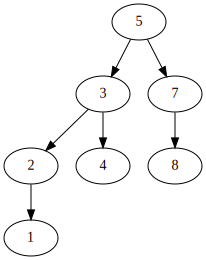

In [28]:
# ---
# Fake tree, no, cringe

# Test of section / question 1

# eg 1
node_1 = Node(5)
node_1.left = Node(3)
node_1.left.right = Node(4)
node_1.left.left = Node(2)
node_1.right = Node(7)
node_1.right.right = Node(8)

node_1.left.right.left = Node(1)

print('eg 1', check_bst(node_1, -math.inf))
dot = visualize_tree(node_1)


# eg 2
node_2 = Node(5)
node_2.left = Node(3)
node_2.left.right = Node(4)
node_2.left.left = Node(2)
node_2.right = Node(7)
node_2.right.right = Node(8)

node_2.left.left.left = Node(1)

print('eg 2', check_bst(node_2, -math.inf))
dot = visualize_tree(node_2)


***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

Balanced:  True


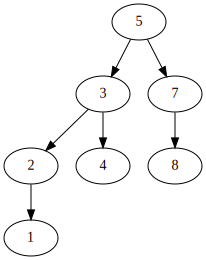

Balanced:  False


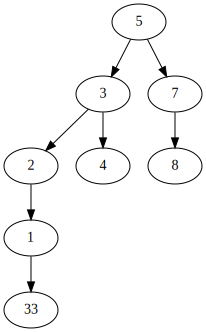

In [62]:
### TODO ###
### Good Luck ###

def node_height(nodes):
    if nodes == None:
        return 0
    # --
    left = node_height(nodes.left)
    right = node_height(nodes.right)
    return max(left,right) + 1

def check_bst_balanced(nodes):
    # Empty Tree
    if nodes == None:
        return True
    # --
    
    # Recersivly get the height down the left and right nodes
    left = node_height(nodes.left)
    right = node_height(nodes.right)
    
    # Get the distance between the two heighest points
    difference = abs(left - right)
    
    # If the difference is not greater than 1 keep checking down nodes
    if difference <= 1:
        return check_bst_balanced(nodes.left) and check_bst_balanced(nodes.right)
    else: # else there is a large difference, return false. This will result in subsiquent return checks returning false.
        return False
    
# --


print('Balanced: ',check_bst_balanced(node_2))
dot = visualize_tree(node_2)

node_2.left.left.left.left = Node(33)

print('Balanced: ',check_bst_balanced(node_2))
dot = visualize_tree(node_2)


# Remove for use later
node_2.left.left.left.left = None


***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

5


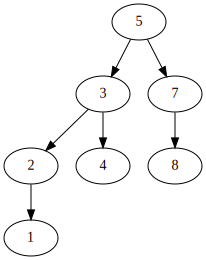

In [30]:
#### TODO ####
### Good Luck ###

def first_common_ansestor(nodes, val1, val2):
    if nodes == None:
        return None
    
    # left of this node
    if nodes.val > val1 and nodes.val > val2:
        return first_common_ansestor(nodes.left, val1, val2)
    # right of this node
    elif nodes.val < val1 and nodes.val < val2:
        return first_common_ansestor(nodes.right, val1, val2)
    # this node is directly inbetween therefor return this node
    else:
        return nodes
# --


print(first_common_ansestor(node_2, 1, 8).val)
dot = visualize_tree(node_2)



***

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

--- TEST FOR ROTATION ---


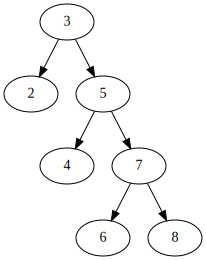

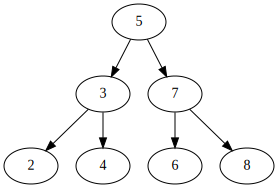

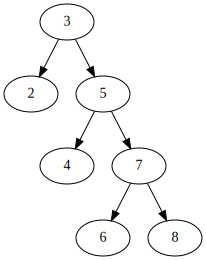

In [31]:
#### TODO ####
### Good Luck ###


def rotate_left(nodes, node):
    if node == False:
        return False
    # --
    top = False
    if nodes == node:
        top = True
    
    pivot = node.right
    node.right = pivot.left

    pivot.left = node
    #node = pivot
    
    #print(node.left.val, node.right.val)
    
    if top:
        return pivot
    
    return nodes
# --

def rotate_right(nodes, node):
    if node == False:
        return False
    # --
    top = False
    if nodes == node:
        top = True
    
    pivot = node.left
    node.left = pivot.right

    pivot.right = node
    #node = pivot
    
    #print(node.left.val, node.right.val)
    
    if top:
        return pivot
    
    return nodes
# --



#test4 = [1,5, 25, 15, 424, 23,6, 7, 42 ,2, 6, 5,84, 67, 68, 7,8,87, 99]

#test4 = np.unique(test4)
#test4_tree = buildBinaryTree(test4)

print('--- TEST FOR ROTATION ---')

test4 = Node(3)
test4.left = Node(2)
test4.right = Node(5)
test4.right.left = Node(4)
test4.right.right = Node(7)
test4.right.right.left = Node(6)
test4.right.right.right = Node(8)


test4_tree = test4

dot = visualize_tree(test4_tree)


node_3 = search(test4_tree, 3)
test4_tree = rotate_left(test4_tree, node_3)
dot = visualize_tree(test4_tree)

node_5 = search(test4_tree, 5)
test4_tree = rotate_right(test4_tree, node_5)

dot = visualize_tree(test4_tree)

***

### Section 6: Insertion in an AVL Tree

In [32]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
     
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [33]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)


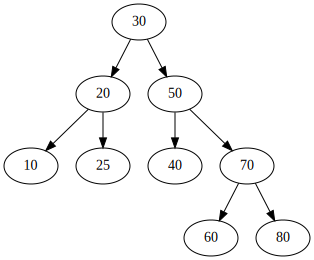

In [34]:
dot = visualize_tree(root)

--- TEST CASE ---


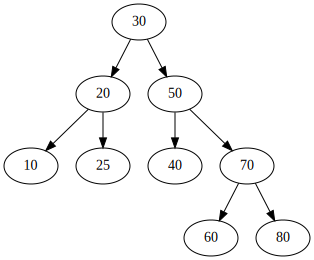

--- TEST CASE ---


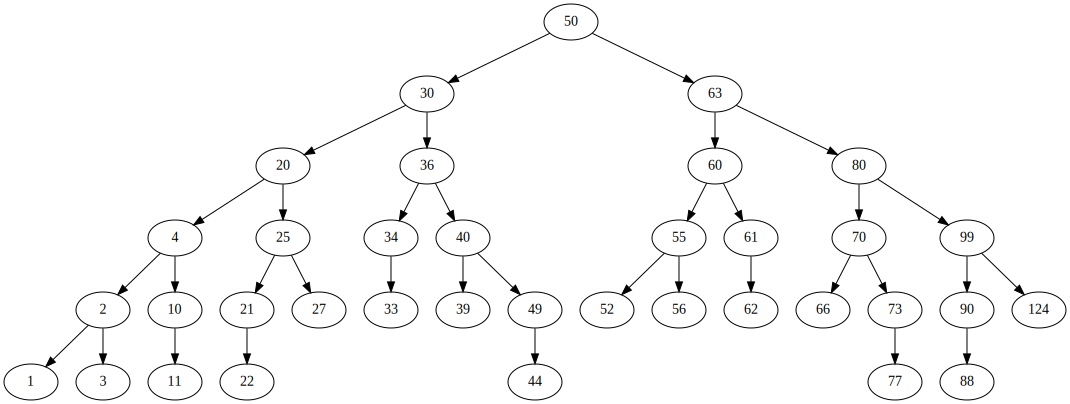

--- TEST CASE ---


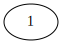

--- TEST CASE ---


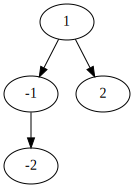

--- TEST CASE ---


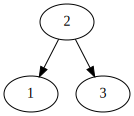

--- TEST CASE ---


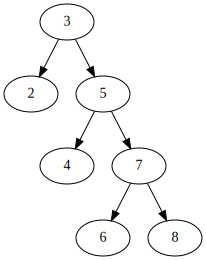

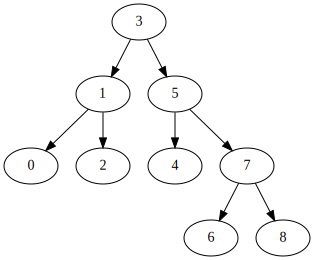

--- TEST CASE ---


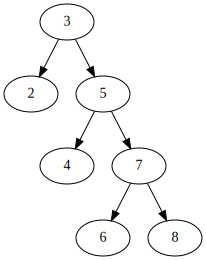

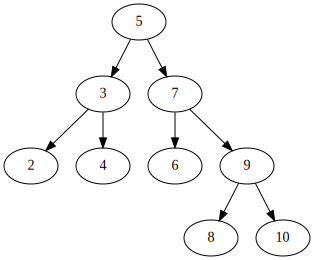

--- TEST CASE - BINARY COMPARISON ---


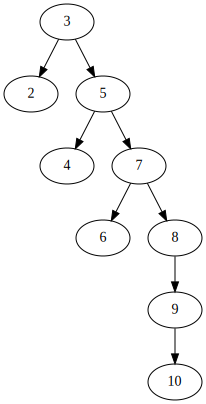

--- TEST CASE ---


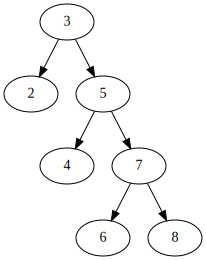

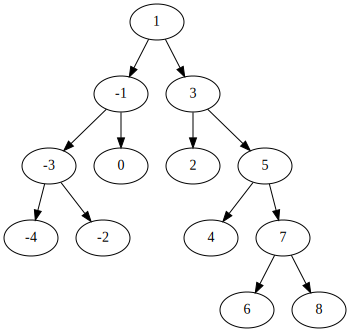

--- TEST CASE - BINARY COMPARISON ---


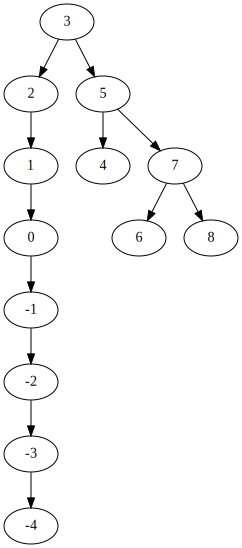

In [40]:
def test_avl(vals):
    myTree = AVL_Tree()
    root = None
    for val in vals:
        root = myTree.insert(root, val)
    # --
    if len(vals):
        dot = visualize_tree(root)
# --
print('--- TEST CASE ---')
node_vals = [10, 20, 30, 40, 50, 25, 60, 70, 80]
test_avl(node_vals)

print('--- TEST CASE ---')
node_vals = [10, 20, 30, 40, 50, 25, 60, 61, 62, 63, 70, 80, 90, 124, 21, 52, 27, 36, 49, 39, 34, 99, 73, 55, 1, 2, 3, 4, 11, 22, 33, 44, 56, 66, 77, 88]
test_avl(node_vals)


print('--- TEST CASE ---')
node_vals = [1]
test_avl(node_vals)

print('--- TEST CASE ---')
node_vals = [1,-1, 2, -2]
test_avl(node_vals)

print('--- TEST CASE ---')
test_avl([1,2,3])


print('--- TEST CASE ---')
test7 = TreeNode(3)
test7.height = 0
test7.left = TreeNode(2)
test7.left.height = 1
test7.right = TreeNode(5)
test7.right.height = 1
test7.right.left = TreeNode(4)
test7.right.left.height = 2
test7.right.right = TreeNode(7)
test7.right.right.height = 2
test7.right.right.left = TreeNode(6)
test7.right.right.left.height = 3
test7.right.right.right = TreeNode(8)
test7.right.right.right.height = 3

dot = visualize_tree(test7)

test7 = myTree.insert(test7, 1)
test7 = myTree.insert(test7, 0)

dot = visualize_tree(test7)



print('--- TEST CASE ---')
test7 = TreeNode(3)
test7.height = 0
test7.left = TreeNode(2)
test7.left.height = 1
test7.right = TreeNode(5)
test7.right.height = 1
test7.right.left = TreeNode(4)
test7.right.left.height = 2
test7.right.right = TreeNode(7)
test7.right.right.height = 2
test7.right.right.left = TreeNode(6)
test7.right.right.left.height = 3
test7.right.right.right = TreeNode(8)
test7.right.right.right.height = 3

dot = visualize_tree(test7)

myTree = AVL_Tree()

test7 = myTree.insert(test7, 9)
test7 = myTree.insert(test7, 10)

dot = visualize_tree(test7)


print('--- TEST CASE - BINARY COMPARISON ---')
test4 = Node(3)
test4.left = Node(2)
test4.right = Node(5)
test4.right.left = Node(4)
test4.right.right = Node(7)
test4.right.right.left = Node(6)
test4.right.right.right = Node(8)

insert(test4, 9)
insert(test4, 10)
dot = visualize_tree(test4)


print('--- TEST CASE ---')
test7 = TreeNode(3)
test7.height = 0
test7.left = TreeNode(2)
test7.left.height = 1
test7.right = TreeNode(5)
test7.right.height = 1
test7.right.left = TreeNode(4)
test7.right.left.height = 2
test7.right.right = TreeNode(7)
test7.right.right.height = 2
test7.right.right.left = TreeNode(6)
test7.right.right.left.height = 3
test7.right.right.right = TreeNode(8)
test7.right.right.right.height = 3

dot = visualize_tree(test7)

myTree = AVL_Tree()

test7 = myTree.insert(test7, 1)
test7 = myTree.insert(test7, 0)
test7 = myTree.insert(test7, -1)
test7 = myTree.insert(test7, -2)
test7 = myTree.insert(test7, -3)
test7 = myTree.insert(test7, -4)


dot = visualize_tree(test7)


print('--- TEST CASE - BINARY COMPARISON ---')
test4 = Node(3)
test4.left = Node(2)
test4.right = Node(5)
test4.right.left = Node(4)
test4.right.right = Node(7)
test4.right.right.left = Node(6)
test4.right.right.right = Node(8)

insert(test4, 1)
insert(test4, 0)
insert(test4, -1)
insert(test4, -2)
insert(test4, -3)
insert(test4, -4)
dot = visualize_tree(test4)



### <font color='red'> Section 12: Re-write the algorithm of insertion in an RB Tree shown earlier. Make sure you complete all the parts, including Right-rotate, Left-rotate, etc. </font>

In [59]:

class RB_Node(object):
    
    def __init__(self, val):
        
        self.val = val
        self.parent = None
        self.left = None
        self.right = None
        self.color = 0
# --

class RB_Tree(object):
    
    def __init__(self):
        self.nil = RB_Node(0)
        self.nil.dont_show = True
        self.nil.color = 0
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil
    # --

    def insert(self, node):
        node = RB_Node(node)
        y = None
        x = self.root
        while x != self.nil:
            y = x
            if node.val < x.val:
                x = x.left
            elif node.val > x.val:
                x = x.right
            else:
                return
        # --
        node.parent = y
        if y == None:
            self.root = node
        elif node.val < y.val:
            y.left = node
        else:
            y.right = node
        node.left = self.nil
        node.right = self.nil
        node.color = 1
        self.rb_fix_insert(node)
    # --

    def rb_fix_insert(self, node):
        while node.parent and node.parent.color == 1:
            if node.parent == node.parent.parent.left:
                y = node.parent.parent.right
                if y.color == 1:
                    node.parent.color = 0
                    y.color = 0
                    node.parent.parent.color = 1
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.left_rotate(node)
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    self.right_rotate(node.parent.parent)
            else:
                y = node.parent.parent.left
                if y.color == 1:
                    node.parent.color = 0
                    y.color = 0
                    node.parent.parent.color = 1
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.right_rotate(node)
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    self.left_rotate(node.parent.parent)
            # --
        # --
        self.root.color = 0
    # --


    def right_rotate(self, node):
        y = node.left
        node.left = y.right
        if y.right != self.nil:
            y.right.parent = node
        # --
        y.parent = node.parent
        if node.parent is None:
            self.root = y
        elif node == node.parent.right:
            node.parent.right = y
        else:
            node.parent.left = y
        y.right = node
        node.parent = y
    # --

    def left_rotate(self, node):
        y = node.right
        node.right = y.left
        if y.left != self.nil:
            y.left.parent = node
        # --
        y.parent = node.parent
        if node.parent is None:
            self.root = y
        elif node == node.parent.left:
            node.parent.left = y
        else:
            node.parent.right = y
        y.left = node
        node.parent = y
    # --
# --

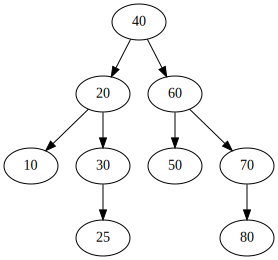

In [60]:

rb_tree = RB_Tree()

node_vals = [10, 20, 30, 40, 50, 25, 60, 70, 80]

rb_node_list = []

for val in node_vals:
    rb_tree.insert(val)
# --

dot = visualize_tree(rb_tree.root)

***